# Week-1

# Linear Regression Example using tensorflow
Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.


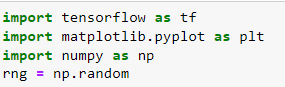

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
rng=np.random

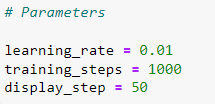

In [2]:
learning_rate=0.01
training_steps=1000
display_step=50

#### Just run the next cell using 'Ctrl' + 'Enter'

In [3]:
# Training Data.

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])

Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = X.shape[0]

In [4]:
print(X,'\n',X.shape)

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ] 
 (17,)


In [5]:
print(Y,'\n',Y.shape)

[1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ] 
 (17,)


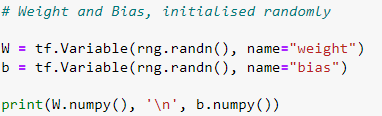

In [6]:
W=tf.Variable(rng.randn(),name="weight")
b=tf.Variable(rng.randn(),name="bias")

print(W.numpy(),'\n',b.numpy())

-0.68718207 
 2.3497677


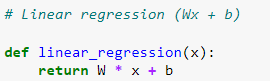

In [7]:
def linear_regression(x):
    return W*x+b

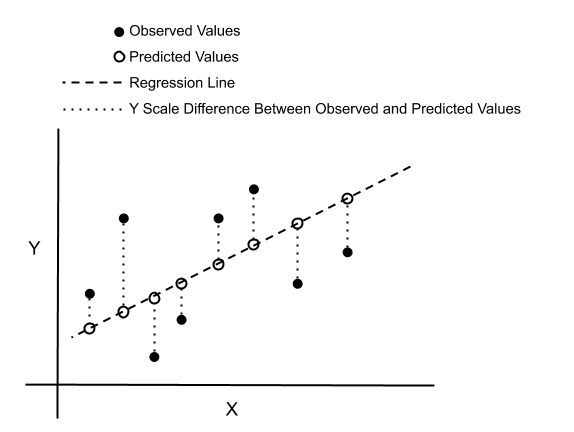

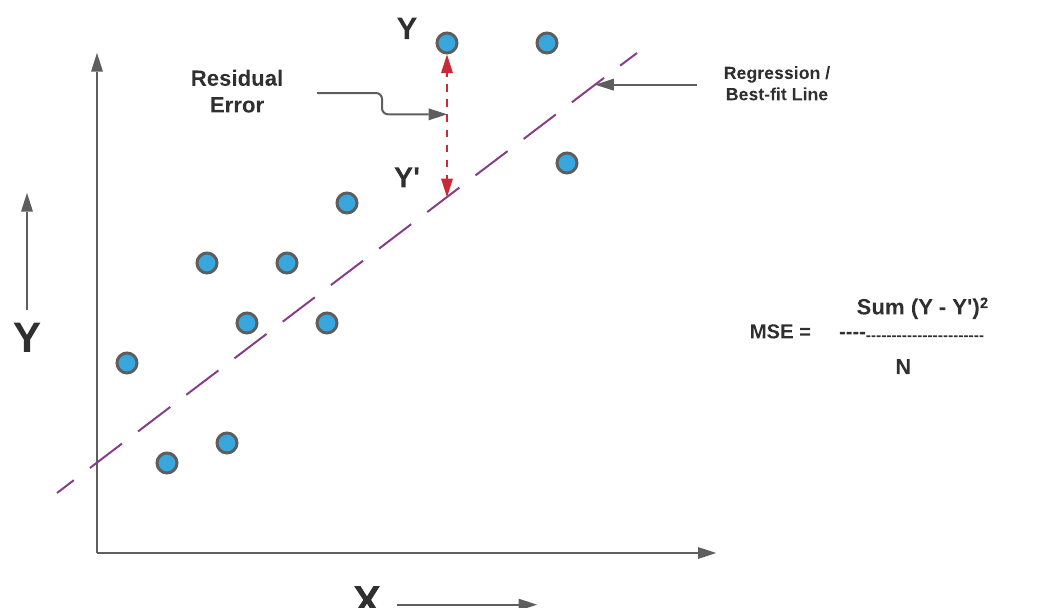

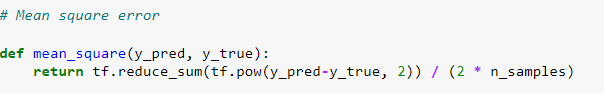

In [8]:
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true,2))/(2*n_samples)

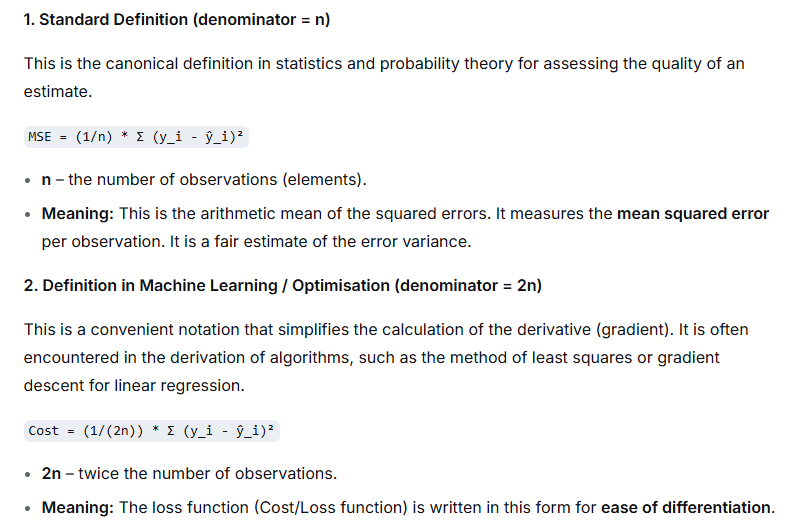

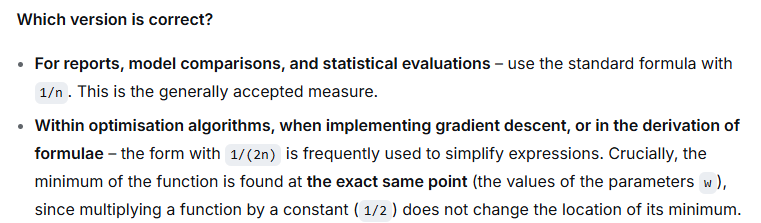

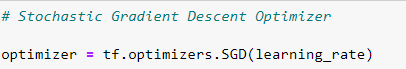

In [9]:
optimizer=tf.optimizers.SGD(learning_rate)

In [10]:
# Adding a question mark () after the function name lets you view the latest documentation. 
# This is a handy tool.

In [11]:
tf.optimizers.SGD?

Init signature:
tf.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='SGD',
    **kwargs,
)
Docstring:     
Gradient descent (with momentum) optimizer.

Update rule for parameter `w` with gradient `g` when `momentum` is 0:

```python
w = w - learning_rate * g
```

Update rule when `momentum` is larger than 0:

```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```

When `nesterov=True`, this rule becomes:

```python
velocity = momentum * velocity - learning_rate * g
w = w + momentum * velocity - learning_rate * g
```

Args:
    learning_rate: A float, a
        `keras.optimizers.schedules.LearningRateSchedule` instance, or
        a callable that takes no arguments and returns the actual value to


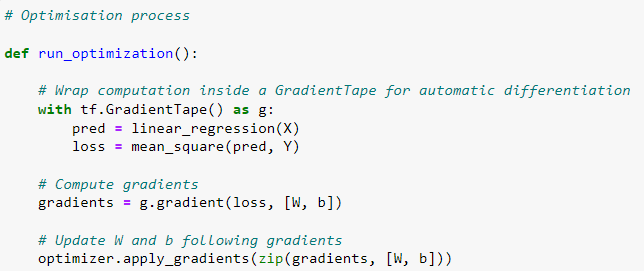

In [12]:
def run_optimization():

    with tf.GradientTape() as g:
        pred=linear_regression(X)
        loss=mean_square(pred,Y)

        gradient=g.gradient(loss,[W,b])

        optimizer.apply_gradients(zip(gradient,[W,b]))

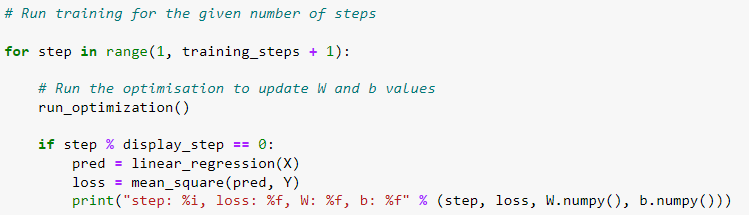

In [13]:
for step in range (1,training_steps+1):

    run_optimization()

    if step % display_step==0:
        pred=linear_regression(X)
        loss=mean_square(pred,Y)
        print("step: %i, loss: %f, W: %f, b:%f" % (step, loss, W.numpy(),b.numpy()) )

step: 50, loss: 0.226274, W: 0.032538, b:2.352099
step: 100, loss: 0.209194, W: 0.045448, b:2.260577
step: 150, loss: 0.194067, W: 0.057596, b:2.174448
step: 200, loss: 0.180670, W: 0.069029, b:2.093393
step: 250, loss: 0.168805, W: 0.079789, b:2.017115
step: 300, loss: 0.158297, W: 0.089914, b:1.945330
step: 350, loss: 0.148991, W: 0.099443, b:1.877775
step: 400, loss: 0.140749, W: 0.108410, b:1.814201
step: 450, loss: 0.133450, W: 0.116849, b:1.754372
step: 500, loss: 0.126985, W: 0.124791, b:1.698069
step: 550, loss: 0.121260, W: 0.132265, b:1.645083
step: 600, loss: 0.116190, W: 0.139298, b:1.595219
step: 650, loss: 0.111700, W: 0.145917, b:1.548294
step: 700, loss: 0.107723, W: 0.152146, b:1.504133
step: 750, loss: 0.104201, W: 0.158008, b:1.462574
step: 800, loss: 0.101082, W: 0.163525, b:1.423463
step: 850, loss: 0.098320, W: 0.168716, b:1.386658
step: 900, loss: 0.095873, W: 0.173602, b:1.352020
step: 950, loss: 0.093706, W: 0.178200, b:1.319424
step: 1000, loss: 0.091788, W: 0

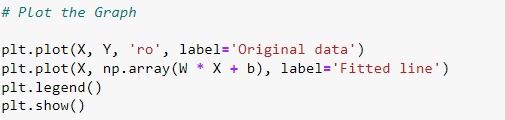

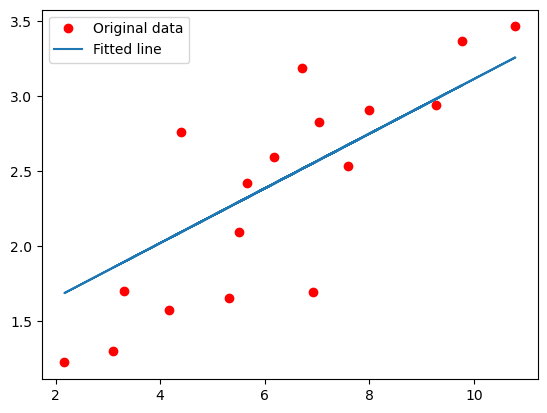

In [14]:
plt.plot(X,Y,'ro',label='Original data')
plt.plot(X,np.array(W*X+b),label='Fitted line')
plt.legend()
plt.show()

# Lab Logbook requirements: 
### Please make sure to document the following in your Lablogbook:

Include an image of the generated graph depicting the original data and the fitted line for linear regression. Modify the appearance of the graph by adjusting its color or size, making it different from the graph of your classmates. Copy the figure and paste it directly into your logbook. Refrain from taking a snapshot; instead, right-click and copy the graph to your lab logbook. Ensure that no code or other information is added to the logbook and that only required graph is present.  

#### Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

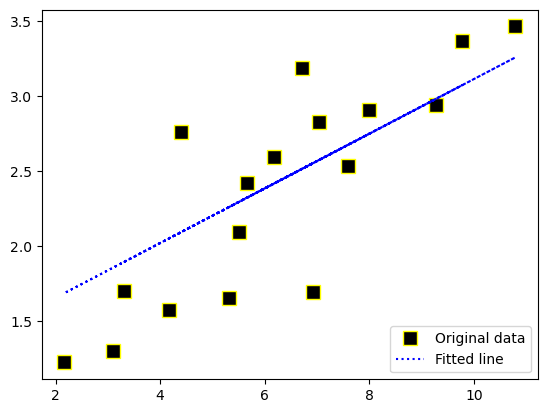

In [27]:
plt.plot(X,Y,marker='s',
         markersize=10,
         markeredgecolor='yellow',
         markerfacecolor='black',
         linestyle='none',
         label='Original data')
plt.plot(X, np.array(W *X + b),color='blue',linestyle='dotted',label='Fitted line')

plt.legend(loc='lower right')
plt.show()